In [23]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [24]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import math 
import numpy as np
import numpy.linalg as nplg
import matplotlib.pyplot as plt
from scipy.special import expit
import itertools

%matplotlib inline

#Import Data as Numpy Matrices
X_train = np.genfromtxt ('X_train.csv', delimiter=",")
Y_train = np.genfromtxt ('y_train.csv',delimiter=",")
X_test = np.genfromtxt ('X_test.csv', delimiter=",")
Y_test = np.genfromtxt ('y_test.csv',delimiter=",")

In [25]:
#Function for computing Bernouli MLE
def bern_MLE(X,Y,a):
    sum=0.0
    count=0
    for i in xrange(len(X)):
        if Y[i]==a:
            sum+=X[i]
            count+=1
        else:
            continue
    return (sum/count)

# Function for computing Pareto MLE
def pareto_MLE(X,Y,a):
    sum=0.0
    count=0
    for i in xrange(len(X)):
        if Y[i]==a: 
            sum+=math.log(X[i])
            count+=1
        else:
            continue
    return count/sum

# Function for calculating Accuracy
def Accuracy(Y_test,Y_pred,label=0):
    mat= np.zeros((2,2))
    for i in xrange(len(y_pred)):
        if Y_pred[i]==label and Y_test[i]==label:
            mat[0][0]+=1
        elif Y_pred[i]==label and Y_test[i]==1:
            mat[0][1]+=1
        elif Y_pred[i]==1 and Y_test[i]==label:
            mat[1][0]+=1
        else:
            mat[1][1]+=1
    return mat,round(100*(np.trace(mat))*1.0/len(Y_test),3)

def confusion_matrix(cm, classes,
                          title,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Question 2:
### (a) Implementation of Naive Bayes and Accuracy Table

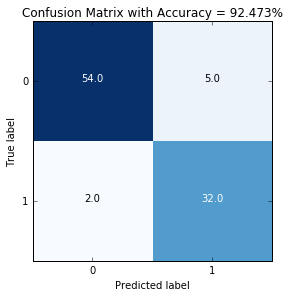

In [26]:
# Obtain feature MLE vectors by applying respective funtions for each distribution given class
MLE_Ytrain_bern = np.mean(Y_train)

MLE_Xtrain_bern0 = np.apply_along_axis(bern_MLE,0,X_train[:,0:54],Y_train,0)
MLE_Xtrain_bern1 = np.apply_along_axis(bern_MLE,0,X_train[:,0:54],Y_train,1)
    
MLE_Xtrain_par0 = np.apply_along_axis(pareto_MLE,0,X_train[:,54:],Y_train,0)
MLE_Xtrain_par1 = np.apply_along_axis(pareto_MLE,0,X_train[:,54:],Y_train,1)

# Concatenate Bernouli and Pareto MLEs into one vector for each class
MLE_Xtrain0=np.concatenate((MLE_Xtrain_bern0,MLE_Xtrain_par0))
MLE_Xtrain1=np.concatenate((MLE_Xtrain_bern1,MLE_Xtrain_par1))

    
# Calculate values for posterior given y_test=0

post_y0=[]
for i in xrange(len(X_test)):
    prod=(1-MLE_Ytrain_bern)
    for j in xrange(len(X_test[i,:])):
        if j<54:
            prod*=((MLE_Xtrain0[j])**X_test[i,j])*((1-MLE_Xtrain0[j])**(1-X_test[i,j]))
        else:
            prod*=(MLE_Xtrain0[j])*((X_test[i,j])**(-(1+((MLE_Xtrain0[j])))))
    post_y0.append(prod)

# Calculate values for posterior given y_test=1  
post_y1=[]
for i in xrange(len(X_test)):
    prod=MLE_Ytrain_bern
    for j in xrange(len(X_test[i,:])):
        if j<54:
            prod*=((MLE_Xtrain1[j])**X_test[i,j])*((1-MLE_Xtrain1[j])**(1-X_test[i,j]))
        else:
            prod*=(MLE_Xtrain1[j])*((X_test[i,j])**(-(1+((MLE_Xtrain1[j])))))
    post_y1.append(prod)

y_pred=[]

for i in xrange(len(post_y0)):
    if post_y0[i]>post_y1[i]:
        y_pred.append(0)
    else:
        y_pred.append(1)

confusion_matrix(Accuracy(Y_test,y_pred)[0],classes=['0','1'],title='Confusion Matrix with Accuracy = ' + str(Accuracy(Y_test,y_pred)[1])+'%')




### (b) In one figure, show a stem plot (stem() in Matlab) of the 54 Bernoulli parameters for each class. Use the file “spambase.names” to make an observation about dimensions 16 and 52.

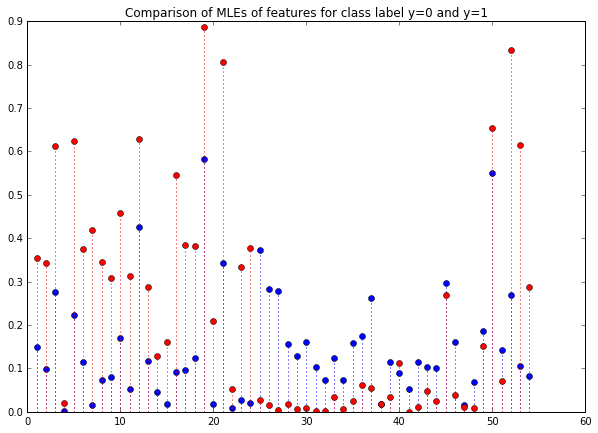

In [27]:
#Stem Plot
import pylab as plb

x = [i for i in xrange(1,55)]
# f = plt.subplots(1, 2, sharey=True,figsize=(15,5))


plt.figure(figsize=(10,7))
markerline1, stemlines1, baseline1 = plt.stem(x,MLE_Xtrain_bern0, markerfmt='o', label='y=0')
plt.setp(markerline1,'markerfacecolor','b')
plt.setp(stemlines1, 'color','b')
plt.setp(stemlines1, 'linestyle', 'dotted')

markerline2, stemlines2, baseline2 = plt.stem(x,MLE_Xtrain_bern1, markerfmt='o', label='y=1',color='r')
plt.setp(markerline2,'markerfacecolor','r')
plt.setp(stemlines2, 'color', 'r')
plt.setp(stemlines2, 'linestyle', 'dotted')
# plt.set_title("Comparison of MLEs of features for class label y=1")
plt.title("Comparison of MLEs of features for class label y=0 and y=1")

plt.show()

The 16th dimension is the frequency of the word 'free' and 52nd dimension is the frequency of exclamation mark '!'. The following are the inferences that can be made:

* For class label y=1, both dimensions (16th and 52nd) have much higher MLE values when compared class y=0. This is expected as most spam mails (which are promotions or advertisements) are likely to contain 'free' and '!'. **Given that the mail is spam (y=1) the probability of occurence of 'free' and '!' is high when compared to non=spam**

* The ratio of the MLE's of the two dimensions is closer to 1 (1.537) for spam mails when compared to non-spam (2.95). This shows likely co-occurance of these two expressions in spam mails. Creation of an interation variable between the two dimensions could be a good predictor of spam mails.

### (c) Implementation of Knn Classification and Plot

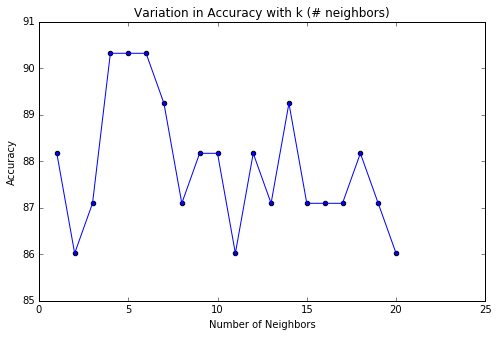

In [28]:
# k-NN Classfier

# Compute distance between two vectors

def knnClassifier(X,Y,x0,k):
    distance=[]
    for i in xrange(len(X)):
        distance.append(np.array([Y[i],nplg.norm(X[i,:]-x0,1)]))
    Y_pred_dist=np.array(distance)
    Y_pred_dist_sorted=Y_pred_dist[Y_pred_dist[:,1].argsort()]
    top_k_neighbors=Y_pred_dist_sorted[0:k,:]
    class1_count=sum(top_k_neighbors[:,0])
    class0_count=len(top_k_neighbors[:,0])-class1_count

    if class1_count>class0_count:
        return 1
    else:
        return 0

def minmax(X):
    return (X-min(X))/max(X)

X_train_std=np.apply_along_axis(minmax,0,X_train)
X_test_std=np.apply_along_axis(minmax,0,X_test)


acc=[]

for k in xrange(1,21):
    Y_pred_k=[]
    for X in X_test:
        Y_pred_k.append(knnClassifier(X_train,Y_train,X,k))
    acc.append(Accuracy(Y_test,Y_pred_k)[1])

plt.figure(figsize=(8,5))
plt.scatter(xrange(1,21),acc)
plt.plot(xrange(1,21),acc)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Variation in Accuracy with k (# neighbors)")
plt.show()

### (d) Implementing Logistic Regression and Steepest ascent

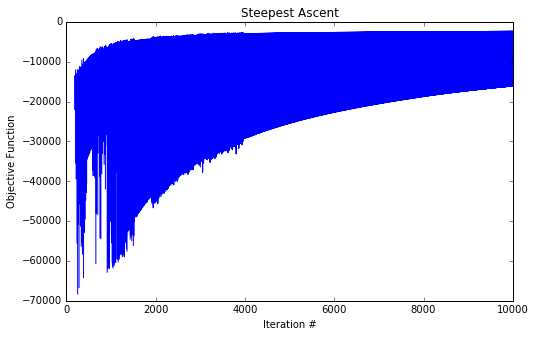

In [29]:
def minmax(X):
    return (X-min(X))/max(X)

#Add ones to the front of training dataset
X_train0 = np.concatenate((np.ones((len(X_train),1)),X_train), 1)
X_test0 = np.concatenate((np.ones((len(X_test),1)),X_test), 1)

#Change all 0s to -1 in Y_train and Y_test
for i in xrange(len(Y_train)):
    if Y_train[i]==0:
        Y_train[i]=-1
    else:
        continue

        
for i in xrange(len(Y_test)):
    if Y_test[i]==0:
        Y_test[i]=-1
    else:
        continue

def sigmoid(x):
    return expit(x)

def objective(X,Y,w):
    return np.sum(np.log(sigmoid(Y*(np.dot(X,w)))))

def gradient_log_likelihood(X,Y,w):
    A=np.array(np.transpose(np.matrix((np.ones(len(X))-sigmoid(np.multiply(Y,np.dot(X,w))))*Y)))
    X=np.array(X)
    return np.sum(A*X,axis=0)
    
def steepest_ascent(X,Y,w0,iters):
    w_t=w0
    obj=[]
    obj.append(objective(X,Y,w0))
    for i in xrange(1,iters+1):
        eta=1/(100000*math.sqrt(1+i))
        w_t=w_t+eta*gradient_log_likelihood(X,Y,w_t)
        obj.append(objective(X,Y,w_t))
    return obj
    

w_init=np.array([0*i for i in xrange(len(X_train0[0,:]))])
plt.figure(figsize=(8,5))
plt.plot(xrange(0,10001),steepest_ascent(X_train0,Y_train,w_init,10000))
plt.xlabel("Iteration #")
plt.ylabel("Objective Function")
plt.title("Steepest Ascent")
    
    
    

### (e) Computing Accuracy using Newton's Method

91.398


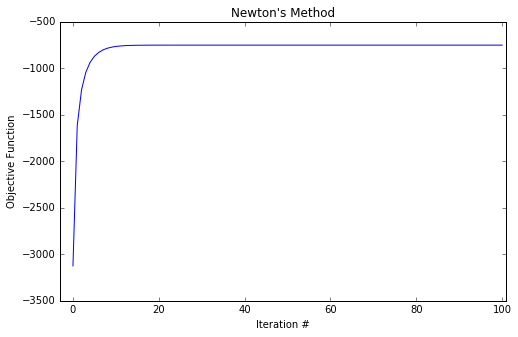

In [32]:
def Hessian(X,w):
    sum=0
    for i in xrange(len(X)):
        sigma=sigmoid(np.dot(X[i,:],w))
        sum+=sigma*(1-sigma)*np.outer(np.transpose(X[i,:]),(X[i,:]))
    return -sum


def Newton_Method(X,Y,w,iters):
    w_t=w
    obj_NM=[objective(X,Y,w_t)]
    for iter in xrange(1,iters+1):
        eta=1/(math.sqrt(iter+1))
        w_t=w_t-eta*np.dot((nplg.inv(Hessian(X,w_t))),gradient_log_likelihood(X,Y,w_t))
        obj_NM.append(objective(X,Y,w_t))
        
    # Returning both the objective function vector and the final weights
    return obj_NM , w_t

w_init=np.array([0*i for i in xrange(len(X_train0[0,:]))])
A=Newton_Method(X_train0,Y_train,w_init,100)

#Computing accuracy from the model output

Obj_NM=A[0]
w_t=A[1]
Y_pred_NM=sigmoid(np.dot(X_test0,w_t))

for i in xrange(len(Y_pred_NM)):
    if Y_pred_NM[i]>0.5:
        Y_pred_NM[i]=1
    else:
        Y_pred_NM[i]=-1

print Accuracy(Y_test,Y_pred_NM,-1)[1]

plt.figure(figsize=(8,5))
plt.xlim(-3,101)
plt.plot(xrange(0,101),Obj_NM)
plt.xlabel("Iteration #")
plt.ylabel("Objective Function")
plt.title("Newton's Method")




### Accuracy = 91.4 %